## Brownian Motion Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 1. Configuration ---
S0 = 100          # Initial Stock Price
mu = 0.10         # Expected Return (10%)
sigma = 0.40      # Volatility (40%)
T = 1.0           # Time Horizon (1 Year)
steps = 252       # Number of time steps (Daily)
dt = T / steps    # Time increment
n_simulations = 100000 # Increased for smoother histograms

# --- 2. Generate random terminal Brownian Motion values W_T ~ N(0, T) ---
W_T = np.random.normal(0, np.sqrt(T), n_simulations)
S_T_bachelier = S0 + (mu * S0) * T + (sigma * S0) * W_T
S_T_gbm = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * W_T)

# Calculate theoretical median
median_bachelier = S0 + (mu * S0) * T 
median_gbm = S0 * np.exp((mu - 0.5 * sigma**2) * T)

In [2]:
print('W_T = ')
print(W_T)

W_T = 
[-0.02641451  0.56418443  0.47622705 ...  1.26794091  0.22876935
 -0.19311188]


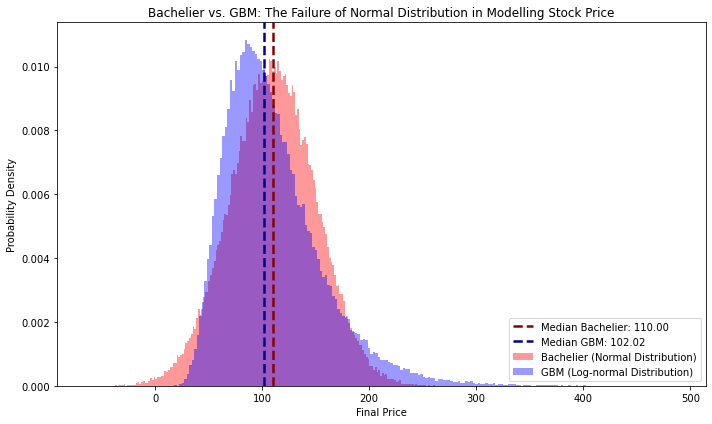

In [3]:
# --- 3. Plot Histograms ---
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(S_T_bachelier, bins=200, alpha=0.4, color='red', 
        label='Bachelier (Normal Distribution)', density=True)
ax.hist(S_T_gbm, bins=200, alpha=0.4, color='blue', 
        label='GBM (Log-normal Distribution)', density=True)

# --- 4. Median Lines (The visual "centers" of the peaks) ---
ax.axvline(median_bachelier, color='darkred', linestyle='--', linewidth=2.5,
           label=f'Median Bachelier: {median_bachelier:.2f}')
ax.axvline(median_gbm, color='darkblue', linestyle='--', linewidth=2.5,
           label=f'Median GBM: {median_gbm:.2f}')

# 5. --- Formatting ---
ax.set_title("Bachelier vs. GBM: The Failure of Normal Distribution in Modelling Stock Price")
ax.set_xlabel("Final Price")
ax.set_ylabel("Probability Density")
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()